In [105]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
import numpy as np

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE, Isomap

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, rand_score, make_scorer, calinski_harabasz_score

# Классификация

In [106]:
data = pd.read_csv('DataSet4_fil.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
dict_firealarm = {"Yes": 1, "No": 0}
data["Fire Alarm"] = data["Fire Alarm"].map(dict_firealarm)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [107]:
data = data.sort_values(by='Fire Alarm', ascending=False)

In [108]:
data[data['Fire Alarm'] == 0].shape, data[data['Fire Alarm'] == 1].shape

((17873, 15), (44757, 15))

In [109]:
X = data.drop(['Fire Alarm'], axis=1)
y = data['Fire Alarm']
X.shape, y.shape

((62630, 14), (62630,))

In [110]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [111]:
np.random.seed(42)
test(X, y)

              precision    recall  f1-score   support

           0       1.00      0.32      0.48      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.32      9395
   macro avg       0.50      0.16      0.24      9395
weighted avg       1.00      0.32      0.48      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Отбор признаков

### 1.1 Отбираем признаки с высокой дисперсией (VarianceThreshold)

In [113]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(62630, 13)

In [114]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1.654768e+09,21.67,49.20,177.0,400.000000,13167.0,20097.0,0.78,0.81,5.38,0.839,0.019,6321.0
1,1.654768e+09,19.26,53.74,215.0,400.000000,13144.0,20050.0,0.63,0.66,4.36,0.681,0.015,6578.0
2,1.654768e+09,20.34,48.98,222.0,1697.440354,13139.0,20044.0,0.70,0.73,4.82,0.752,0.017,6569.0
3,1.654768e+09,19.95,49.52,218.0,400.000000,13138.0,20045.0,0.66,0.68,4.52,0.706,0.016,6570.0
4,1.654768e+09,19.77,50.26,221.0,400.000000,13141.0,20046.0,0.64,0.66,4.40,0.686,0.015,6571.0


In [115]:
test(X_vt, y)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.25      9395
   macro avg       0.50      0.12      0.20      9395
weighted avg       1.00      0.25      0.40      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,-0.221835,0.396469,0.076975,-0.225892,-0.151545,0.816964,0.562326,0.762834,-0.108198,-0.110278,-0.113954,-0.104723,-0.073871,-0.551526
1,-0.219498,0.228876,0.584648,-0.221009,-0.151545,0.733786,0.485214,0.750847,-0.108360,-0.110334,-0.114193,-0.104779,-0.073875,-0.517700
2,-0.219580,0.303980,0.052375,-0.220109,0.516022,0.715704,0.475370,0.744105,-0.108285,-0.110308,-0.114085,-0.104754,-0.073873,-0.518885
3,-0.219571,0.276859,0.112759,-0.220623,-0.151545,0.712087,0.477011,0.750847,-0.108328,-0.110327,-0.114155,-0.104770,-0.073874,-0.518753
4,-0.219562,0.264342,0.195507,-0.220238,-0.151545,0.722937,0.478652,0.758339,-0.108350,-0.110334,-0.114183,-0.104777,-0.073875,-0.518621


In [70]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(62630, 5)
              precision    recall  f1-score   support

           0       1.00      0.44      0.61      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.44      9395
   macro avg       0.50      0.22      0.31      9395
weighted avg       1.00      0.44      0.61      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.2 Одномерный отбор признаков (SelectKBest)

In [66]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

              precision    recall  f1-score   support

           0       1.00      0.32      0.48      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.32      9395
   macro avg       0.50      0.16      0.24      9395
weighted avg       1.00      0.32      0.48      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,UTC,Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],CNT
0,1.654768e+09,49.200000,177.0,20097.0,939.644,6321.0
1,1.654768e+09,53.740000,215.0,20050.0,939.628,6578.0
2,1.654768e+09,48.980000,222.0,20044.0,939.619,6569.0
3,1.654768e+09,49.520000,218.0,20045.0,939.628,6570.0
4,1.654768e+09,50.260000,221.0,20046.0,939.638,6571.0
...,...,...,...,...,...,...
62625,1.654764e+09,10.014466,108.0,20058.0,939.643,2785.0
62626,1.654764e+09,46.230000,116.0,20065.0,939.624,2786.0
62627,1.654764e+09,46.120000,111.0,20063.0,939.624,2787.0
62628,1.654764e+09,46.040000,111.0,20066.0,939.635,2788.0


### 1.3 Рекурсивный отбор признаков (RFE)

In [68]:
tree = DecisionTreeClassifier().fit(X, y)

In [69]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,Humidity[%],Raw H2,Pressure[hPa],CNT
0,49.200000,13167.0,939.644,6321.0
1,53.740000,13144.0,939.628,6578.0
2,48.980000,13139.0,939.619,6569.0
3,49.520000,13138.0,939.628,6570.0
4,50.260000,13141.0,939.638,6571.0
...,...,...,...,...
62625,10.014466,13179.0,939.643,2785.0
62626,46.230000,13184.0,939.624,2786.0
62627,46.120000,13178.0,939.624,2787.0
62628,46.040000,13183.0,939.635,2788.0


In [70]:
test(X_rfe, y)

              precision    recall  f1-score   support

           0       1.00      0.32      0.48      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.32      9395
   macro avg       0.50      0.16      0.24      9395
weighted avg       1.00      0.32      0.48      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.4 Отбор признаков по их значимости

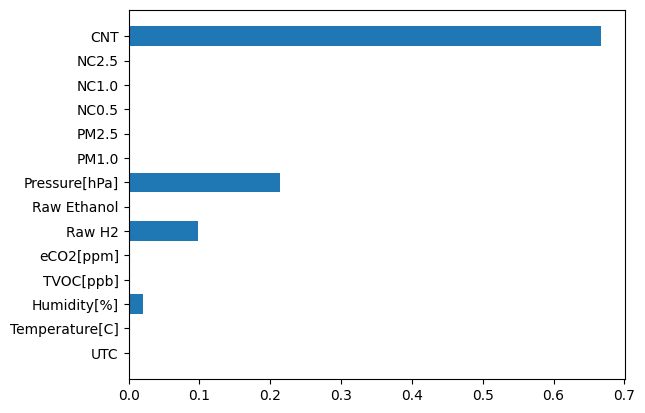

In [71]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2. Выделение признаков

### 2.1 Метод главных компонент (PCA)

In [72]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(62630, 2)

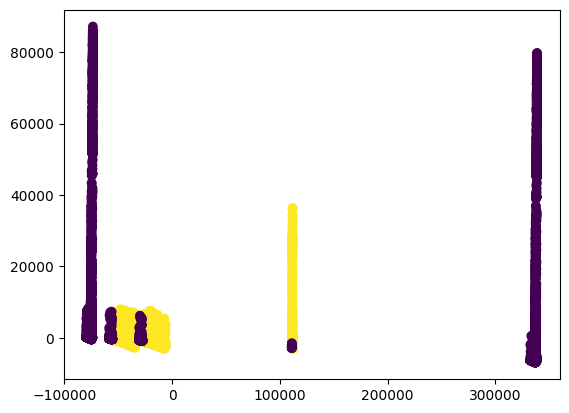

In [73]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [74]:
sum(pca.explained_variance_ratio_)

0.993611604923045

In [75]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       1.00      0.18      0.31      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.18      9395
   macro avg       0.50      0.09      0.16      9395
weighted avg       1.00      0.18      0.31      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [77]:
test(X_pca_2, y)

              precision    recall  f1-score   support

           0       1.00      0.18      0.31      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.18      9395
   macro avg       0.50      0.09      0.16      9395
weighted avg       1.00      0.18      0.31      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


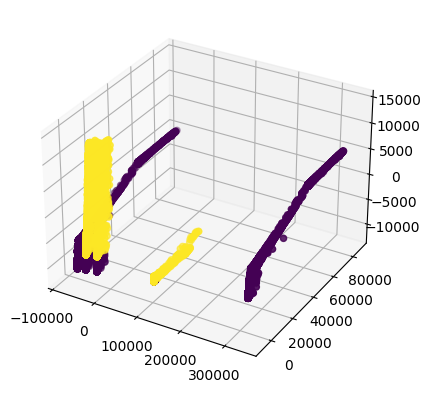

In [78]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

### 2.2 Нелинейные методы выделения признаков (TSNE, Isomap)

In [129]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

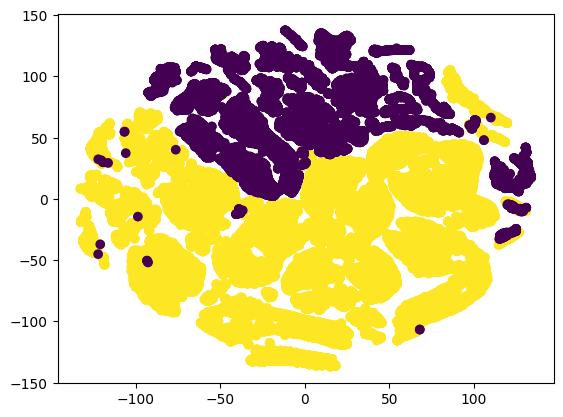

In [82]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [83]:
test(X_tsne, y)

              precision    recall  f1-score   support

           0       1.00      0.33      0.49      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.33      9395
   macro avg       0.50      0.16      0.25      9395
weighted avg       1.00      0.33      0.49      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:10000])

D:\ForUniversity\venv\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages

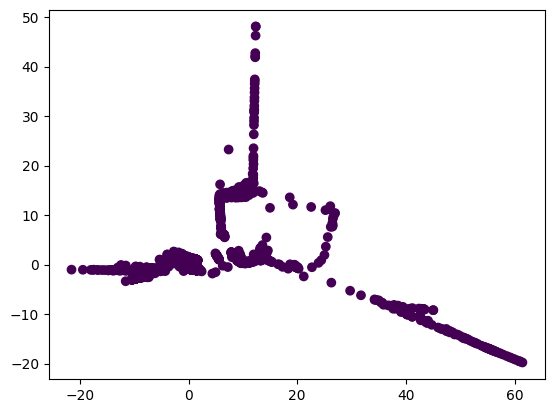

In [127]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:10000]);

D:\ForUniversity\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


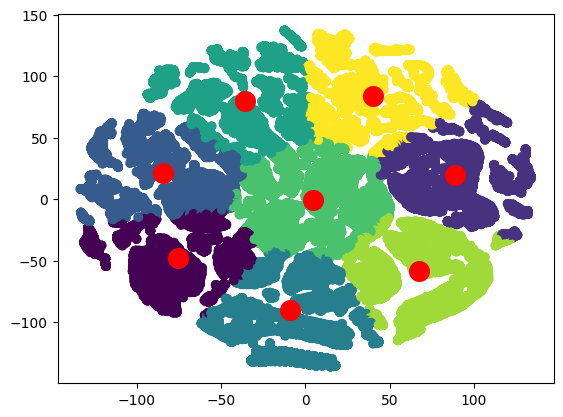

In [130]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [131]:
silhouette_score(X_tsne, kmeans.labels_)

0.3525754

## Обучение

In [71]:
Y = y
X = X_vt

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_bin_knn_pred = knn.predict(X_test)

In [19]:
print(classification_report(Y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5951
           1       1.00      0.99      0.99     14717

    accuracy                           0.99     20668
   macro avg       0.99      0.99      0.99     20668
weighted avg       0.99      0.99      0.99     20668



# Реализация PCA

In [51]:
X_meaned = X_scaled - np.mean(X_scaled , axis = 0)

In [52]:
cov_mat = np.cov(X_meaned , rowvar = False)

In [53]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [54]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [55]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [56]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [57]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [58]:
mat_reduced = PCA(X_scaled , 2)

In [59]:
test(mat_reduced, y)

              precision    recall  f1-score   support

           0       1.00      0.35      0.51      9395
           1       0.00      0.00      0.00         0

    accuracy                           0.35      9395
   macro avg       0.50      0.17      0.26      9395
weighted avg       1.00      0.35      0.51      9395



D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ForUniversity\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

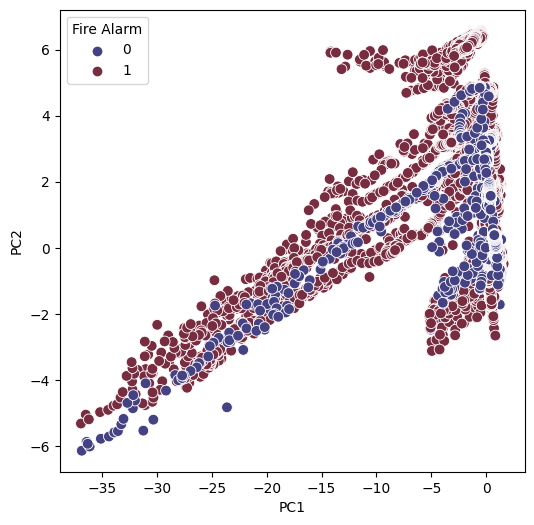

In [63]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(y)] , axis = 1)
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Fire Alarm' , s = 60 , palette= 'icefire')

# Кластеризация с собственной реализацией KMean

In [90]:
class KMeans_:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centers == new_centers):
                break

            self.centers = new_centers

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)

In [92]:
kmeans_o = KMeans_()

In [93]:
kmeans_o.fit(X_train)

In [96]:
pred = kmeans_o.predict(X_test)

In [104]:
print('silhouette_score', round(silhouette_score(X_test, pred), 2))
print('calinski_harabasz_score', round(calinski_harabasz_score(X_test, pred),2))
print('rand_score', round(rand_score(pred, Y_test), 2))
print('adjusted_rand_score', round(adjusted_rand_score(Y_test, pred), 2))

silhouette_score 0.92
calinski_harabasz_score 17930.35
rand_score 0.6
adjusted_rand_score 0.03


# Регрессия

In [20]:
data = pd.read_csv('DataSet3_fil.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building_Flat,type_of_building_Individual House
0,22400000.0,629.0,19.032800,72.896357,2,2,0,False,True,0,0.0,0,1,0
1,35000000.0,974.0,19.032800,72.896357,3,2,0,False,True,0,0.0,0,1,0
2,31700000.0,968.0,19.085600,72.909277,3,3,0,False,True,0,0.0,0,1,0
3,18700000.0,629.0,19.155756,72.846862,2,2,2,True,True,2,0.0,2,1,0
4,13500000.0,1090.0,19.177555,72.849887,2,2,0,True,True,0,0.0,0,1,0


In [21]:
data = data.sort_values(by='price', ascending=False)
data.shape

(6237, 14)

In [22]:
X = data.drop(['price'], axis=1)
y = data['price']
X.shape, y.shape

((6237, 13), (6237,))

In [23]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print("R2: ", r2_score(y_test, bag.predict(X_test)))
  print("MAE: ", mean_absolute_error(y_test, bag.predict(X_test)))
  print("MSE: ", mean_squared_error(y_test, bag.predict(X_test)))

In [24]:
np.random.seed(42)
test(X, y)

R2:  -40.69854920312097
MAE:  9432932.972120473
MSE:  129573834176168.78


## Отбор признаков

### 1.1 Отбираем признаки с высокой дисперсией (VarianceThreshold)

In [14]:
X.describe()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Furnished_status,Lift,type_of_building_Flat,type_of_building_Individual House
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,1185.597723,19.156677,72.868661,2.452301,2.425525,0.822350,0.822350,0.259179,0.822350,0.931698,0.068302
std,637.515522,0.109459,0.058669,0.750140,0.763236,1.291977,1.291977,0.379643,1.291977,0.252284,0.252284
min,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,846.000000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1000.000000,19.147240,72.858017,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1300.000000,19.213053,72.884691,3.000000,3.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000
max,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,1.000000,8.000000,1.000000,1.000000


In [15]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(6237, 1)

In [16]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,area
0,6100.0
1,8000.0
2,3500.0
3,6600.0
4,8000.0


In [17]:
test(X_vt, y)

R2:  -96.00527628715903
MAE:  14547695.041375335
MSE:  301433642753811.1


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building_Flat,type_of_building_Individual House
0,7.709297,-0.805711,-0.713672,2.063379,7.304318,4.781930,0.021937,-0.366342,4.781930,-0.682746,4.781930,0.270757,-0.270757
1,10.689855,-0.805711,-0.713672,3.396571,4.683688,4.007860,0.021937,-0.366342,4.007860,-0.682746,4.007860,-3.693351,3.693351
2,3.630638,-1.073776,-0.480557,10.062528,7.304318,3.233791,0.021937,-0.366342,3.233791,1.951519,3.233791,0.270757,-0.270757
3,8.493654,-1.474128,-0.658367,3.396571,2.063058,1.685652,0.021937,-0.366342,1.685652,-0.682746,1.685652,0.270757,-0.270757
4,10.689855,-1.279215,-0.886303,3.396571,4.683688,0.137513,0.021937,2.729692,0.137513,-0.682746,0.137513,0.270757,-0.270757


In [19]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(6237, 2)
R2:  -131.75394226987086
MAE:  16716270.89513336
MSE:  412518843716065.56


### 1.2 Одномерный отбор признаков (SelectKBest)

In [25]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

R2:  -33.95816658734756
MAE:  8325389.923348255
MSE:  108628807645730.52


In [26]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,area,latitude,longitude,Bedrooms,Bathrooms,Status
0,6100.0,19.068492,72.826794,4.0,8.0,1.0
1,8000.0,19.068492,72.826794,5.0,6.0,1.0
2,3500.0,19.039152,72.840469,10.0,8.0,1.0
3,6600.0,18.995333,72.830038,5.0,4.0,1.0
4,8000.0,19.016667,72.816667,5.0,6.0,1.0
...,...,...,...,...,...,...
6232,800.0,18.943927,72.836039,2.0,2.0,1.0
6233,695.0,19.251949,72.860033,2.0,2.0,1.0
6234,700.0,19.234639,73.161134,2.0,2.0,1.0
6235,580.0,19.182516,73.192604,2.0,2.0,1.0


### 1.3 Рекурсивный отбор признаков (RFE)

In [23]:
tree = DecisionTreeRegressor().fit(X, y)

In [24]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,area,latitude,longitude,Bathrooms
0,6100.0,19.068492,72.826794,8.0
1,8000.0,19.068492,72.826794,6.0
2,3500.0,19.039152,72.840469,8.0
3,6600.0,18.995333,72.830038,4.0
4,8000.0,19.016667,72.816667,6.0
...,...,...,...,...
6232,800.0,18.943927,72.836039,2.0
6233,695.0,19.251949,72.860033,2.0
6234,700.0,19.234639,73.161134,2.0
6235,580.0,19.182516,73.192604,2.0


In [25]:
test(X_rfe, y)

R2:  -33.49942035259237
MAE:  8579922.063661646
MSE:  107203302210000.33


### 1.4 Отбор признаков по их значимости

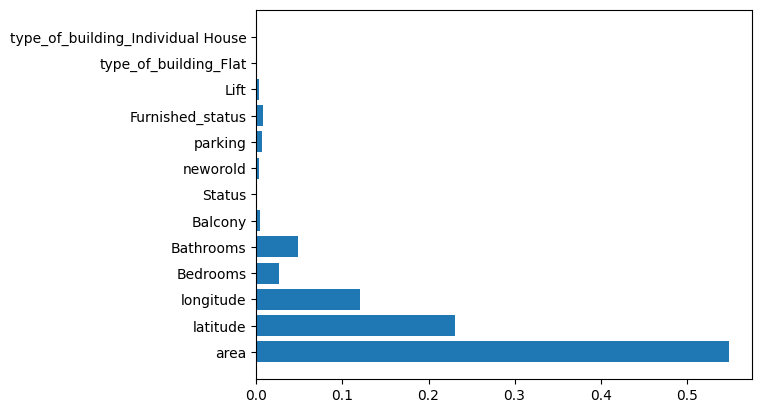

In [26]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2. Выделение признаков

### 2.1 Метод главных компонент (PCA)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(6237, 2)

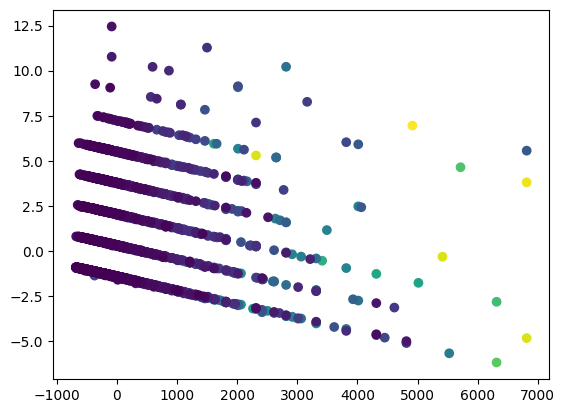

In [28]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [29]:
sum(pca.explained_variance_ratio_)

0.9999976508016255

In [30]:
test(X_pca, y)

R2:  -81.65739914738641
MAE:  13063966.091778591
MSE:  256849131090518.22


In [31]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [32]:
test(X_pca_2, y)

R2:  -74.21070912623237
MAE:  12927356.837606838
MSE:  233709328953466.28


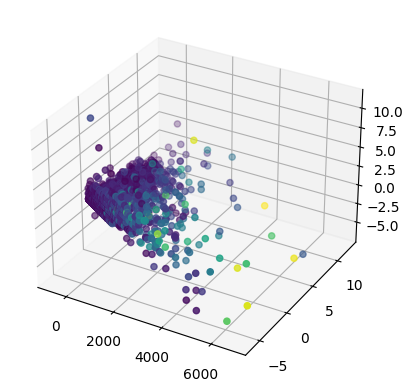

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

### 2.2 Нелинейные методы выделения признаков (TSNE, Isomap)

In [34]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

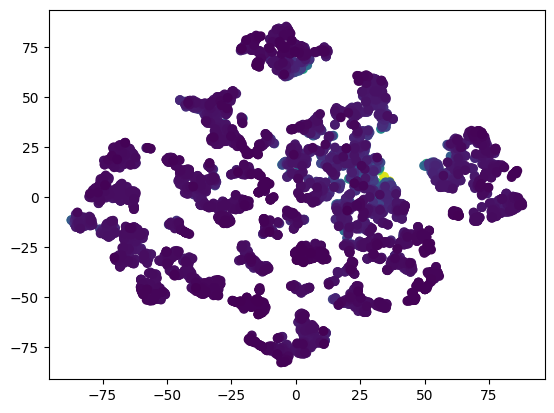

In [36]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [37]:
test(X_tsne, y)

R2:  -71.99971547551101
MAE:  10280525.641025642
MSE:  226838899882478.62


In [38]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

D:\ForUniversity\venv\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ForUniversity\venv\Lib\site-packages

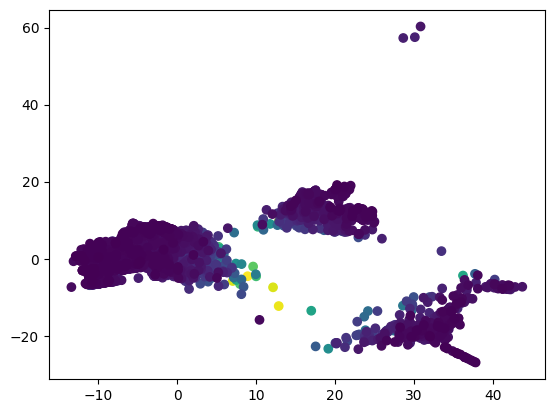

In [39]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y);

D:\ForUniversity\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


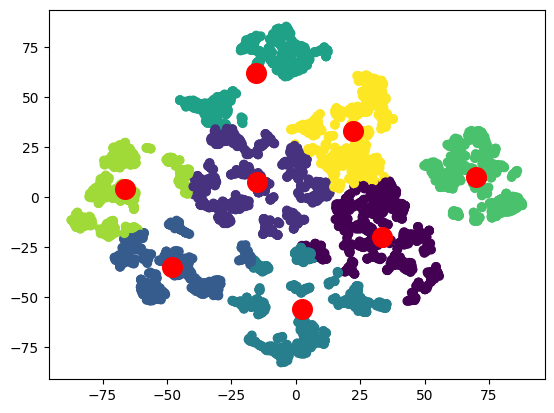

In [40]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [41]:
silhouette_score(X_tsne, kmeans.labels_)

0.42063016

## Обучение

In [27]:
Y = y
X = X_skb
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
lr = LinearRegression().fit(X_train, Y_train)

In [32]:
y_pred = lr.predict(X_test)

In [35]:
print("R2: ", r2_score(Y_test, y_pred))
print("MAE: ", mean_absolute_error(Y_test, y_pred))
print("MSE: ", mean_squared_error(Y_test, y_pred))

R2:  0.6610678874536693
MAE:  9328321.233025279
MSE:  262608079582593.25
